<a href="https://colab.research.google.com/github/Witcape/PSO/blob/main/Final_LLM_Selection_LLM_Weight_Glorot_LLM_Initialisation_Quasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Installing LLM

In [6]:
# !pip install accelerate
# import accelerate

In [7]:
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.78 numpy==1.23.4 --force-reinstall --upgrade --no-cache-dir --verbose
!pip install huggingface_hub
!pip install llama-cpp-python==0.1.78
!pip install numpy==1.23.4

Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.1 MB/s eta 0:00:00
  Running command pip subprocess to install build dependencies
  Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
    Using cached setuptools-70.2.0-py3-none-any.whl (930 kB)
    Using cached scikit_build-0.18.0-py3-none-any.whl (85 kB)
    Using cached cmake-3.30.0-py3-none-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.9 MB)
    Using cached ninja-1.11.1.1-py2.py3-none-manylinux1_x86_64.manylinux_2_5_x86_64.whl (307 kB)
    Using cached distro-1.9.0-py3-none-any.whl (20 kB)
    Using cached packaging-24.1-py3-none-any.whl (53 kB)
    Using cached tomli-2.0.1-py3-none-any.whl (12 kB)
    Using cached wheel-0.43.0-py3-none-any.whl (65 kB)
    Creating /tmp/pip-build-env-xevixhah/overlay/local/bin
    changing mode of /tmp/pip-build-env-xevixhah/overlay/local/bin/ninja to 755
    changing mode of 

In [8]:
model_name_or_path = "TheBloke/Llama-2-13B-chat-GGML"
model_basename = "llama-2-13b-chat.ggmlv3.q5_1.bin"

In [9]:
from huggingface_hub import hf_hub_download
from llama_cpp import Llama
import matplotlib.pyplot as plt

In [10]:
model_path = hf_hub_download(repo_id=model_name_or_path, filename=model_basename)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


llama-2-13b-chat.ggmlv3.q5_1.bin:   0%|          | 0.00/9.76G [00:00<?, ?B/s]

In [11]:
# GPU
lcpp_llm = None
lcpp_llm = Llama(
    model_path=model_path,
    n_threads=2, # CPU cores
    n_batch=512, # Should be between 1 and n_ctx, consider the amount of VRAM in your GPU.
    n_gpu_layers=32 # Change this value based on your model and your GPU VRAM pool.
    )

AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | VSX = 0 | 


In [12]:
lcpp_llm.params.n_gpu_layers

32

### Initialisation using LLM

In [15]:
method =' Quasi-Random Sequence'
prompt = f"generate 20 numbers between -10 to 10 by using {method}, only 2 decimal places, "
prompt_template = f'''SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.

USER: {prompt}

ASSISTANT:
'''

In [16]:
response=lcpp_llm(prompt=prompt_template, max_tokens=256, temperature=0.5, top_p=0.95,
                  repeat_penalty=1.2, top_k=150,
                  echo=True)

Llama.generate: prefix-match hit


In [17]:
print(response)

{'id': 'cmpl-5e34f821-4dca-4b5e-a693-3694c71a53d9', 'object': 'text_completion', 'created': 1720416165, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': 'SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\nUSER: generate 20 numbers between -10 to 10 by using  Quasi-Random Sequence, only 2 decimal places, \n\nASSISTANT:\n\nSure! Here are 20 quasi-random numbers between -10 and 10 with two decimal places:\n\n1. -8.47\n2. -5.63\n3. -2.92\n4. -1.74\n5. -0.98\n6. -0.49\n7. -0.27\n8. 0.15\n9. 0.42\n10. 0.76\n11. 1.13\n12. 1.52\n13. 2.01\n14. 2.53\n15. 3.11\n16. 3.72\n17. 4.48\n18. 5.39\n19. 6.46\n20. 7.70\n\nI hope these numbers meet your needs! Let me know if you have any other questions or requests.', 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 64, 'completion_tokens': 220, 't

In [18]:
import re

text_response = response['choices'][0]['text']

# Use a regular expression to find all numbers in the response
numbers = re.findall(r'-?\d+\.\d+', text_response)

# Convert the numbers to floats
numbers = [float(num) for num in numbers]

Quasi_Random_Sequence_Initialisation = numbers
print(Quasi_Random_Sequence_Initialisation)

[-8.47, -5.63, -2.92, -1.74, -0.98, -0.49, -0.27, 0.15, 0.42, 0.76, 1.13, 1.52, 2.01, 2.53, 3.11, 3.72, 4.48, 5.39, 6.46, 7.7]


## Normalised Glorot Initialization

###PSO Parameters

In [19]:
!pip install pyswarms
import numpy as np
import pyswarms as ps
# from pso.cost_functions import sphere

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 2.9 MB/s eta 0:00:00


In [20]:
# initial_position = np.array(numbers)

# def objective_function(x):
#     return np.sum(x**2)

# bounds = (np.array([-10]), np.array([10]))

# options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

# optimizer = ps.single.GlobalBestPSO(n_particles=len(numbers), dimensions=1, options=options, bounds=bounds, init_pos=initial_position.reshape(-1, 1))

# best_cost, best_pos = optimizer.optimize(objective_function, iters=100)

# print('Best position:', best_pos)
# print('Best objective:', best_cost)


In [21]:
def sphere(x):
    return sum(x**2)

In [22]:
CostFunction = sphere  #
nVar = 10  # Number of Decision Variables
VarSize = (nVar,)  # Size of Decision Variables Matrix
VarMin = -10  # Lower Bound of Variables
VarMax = 10  # Upper Bound of Variables

In [23]:
MaxIt = 20  # Maximum Number of Iterations
nPop = np.size(numbers)  # Population Size (Swarm Size)
print(nPop)

20


In [24]:
w = 1  # Inertia Weight
wdamp = 0.99  # Inertia Weight Damping Ratio
c1 = 1.5  # Personal Learning Coefficient
c2 = 2.0  # Global Learning Coefficient

In [25]:
# Velocity Limits                        HOWW. ASK BHAIYA ABOUT THIS
VelMax = 0.1 * (VarMax - VarMin)
VelMin = -VelMax

In [26]:
particles = []

for i in range(nPop):
    position = np.array([Quasi_Random_Sequence_Initialisation[i]] * nVar)
    velocity = np.zeros(VarSize)
    cost = CostFunction(position)
    best_position = position.copy()
    best_cost = cost
    particles.append({
        'Position': position,
        'Velocity': velocity,
        'Cost': cost,
        'Best': {
            'Position': best_position,
            'Cost': best_cost
        }
    })
print(np.size(particles))

20


In [27]:
GlobalBest = {'Position': None, 'Cost': np.inf}

for p in particles:
    if p['Cost'] < GlobalBest['Cost']:
        GlobalBest = {'Position': p['Best']['Position'].copy(), 'Cost': p['Best']['Cost']}

BestCost = np.zeros(MaxIt)

### Weight W using LLM

In [28]:
w_values = []
g_values = []

for it in range(MaxIt):
    for p in particles:
        # Update Velocity
        r1 = np.random.rand(*VarSize)
        r2 = np.random.rand(*VarSize)
        p['Velocity'] = (
            w * p['Velocity']
            + c1 * r1 * (p['Best']['Position'] - p['Position'])
            + c2 * r2 * (GlobalBest['Position'] - p['Position'])
        )

        # Apply Velocity Limits
        p['Velocity'] = np.maximum(p['Velocity'], VelMin)
        p['Velocity'] = np.minimum(p['Velocity'], VelMax)

        # Update Position
        p['Position'] += p['Velocity']

        # Velocity Mirror Effect
        IsOutside = (p['Position'] < VarMin) | (p['Position'] > VarMax)
        p['Velocity'][IsOutside] = -p['Velocity'][IsOutside]

        # Apply Position Limits
        p['Position'] = np.maximum(p['Position'], VarMin)
        p['Position'] = np.minimum(p['Position'], VarMax)

        # Evaluation
        p['Cost'] = CostFunction(p['Position'])

        # Update Personal Best
        if p['Cost'] < p['Best']['Cost']:
            p['Best']['Position'] = p['Position'].copy()
            p['Best']['Cost'] = p['Cost']

            # Update Global Best
            if p['Best']['Cost'] < GlobalBest['Cost']:  # tell best cost using roullete wheel. LLM will check for global best
                GlobalBest = {'Position': p['Best']['Position'].copy(), 'Cost': p['Best']['Cost']} # tell best cost using roullete wheel

    BestCost[it] = GlobalBest['Cost']

    print(f"Iteration {it+1}: Best Cost = {BestCost[it]}")

    prompt = f"generate one positive number that is smaller than {w} using Normalised Glorot Initialisation. Don't write anything else, just write that number in decimal notation normally."
    w_finder_template = f'''SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.

    USER: {prompt}

    ASSISTANT:
    '''

    w_response = lcpp_llm(prompt=w_finder_template, max_tokens=256, temperature=0.5, top_p=0.95,
                          repeat_penalty=1.2, top_k=150,
                          echo=True)

    g_values.append(GlobalBest['Cost'])
    BestCost[it] = GlobalBest['Cost']

    text_response = w_response['choices'][0]['text']
    value = re.findall(r'-?\d+\.\d+', text_response)
    value = [float(num) for num in value]

    value = value[np.size(value) - 1]
    print(f'w{it+1} = {value}')
    w_values.append(w)
    w = value

w_values.append(w)
print(w_values)

Iteration 1: Best Cost = 0.22499999999999995


Llama.generate: prefix-match hit


w1 = 0.25
Iteration 2: Best Cost = 0.09810795139627493


Llama.generate: prefix-match hit


w2 = 0.13
Iteration 3: Best Cost = 0.08376057910795266


Llama.generate: prefix-match hit


w3 = 0.08
Iteration 4: Best Cost = 0.08288748150594472


Llama.generate: prefix-match hit


w4 = 0.065
Iteration 5: Best Cost = 0.0794958325554964


Llama.generate: prefix-match hit


w5 = 0.047
Iteration 6: Best Cost = 0.0794958325554964


Llama.generate: prefix-match hit


w6 = 0.013
Iteration 7: Best Cost = 0.05647756936714182


Llama.generate: prefix-match hit


w7 = 0.007
Iteration 8: Best Cost = 0.01717378736112647


Llama.generate: prefix-match hit


w8 = 0.0069245381
Iteration 9: Best Cost = 0.015063859889947054


Llama.generate: prefix-match hit


w9 = 0.0067340625
Iteration 10: Best Cost = 0.012880192716405028


Llama.generate: prefix-match hit


w10 = 0.0067198572
Iteration 11: Best Cost = 0.005028653160480521


Llama.generate: prefix-match hit


w11 = 0.0063412949
Iteration 12: Best Cost = 0.0028137935090528383


Llama.generate: prefix-match hit


w12 = 0.0057836329
Iteration 13: Best Cost = 0.0027980794544486117


Llama.generate: prefix-match hit


w13 = 0.0045123456
Iteration 14: Best Cost = 0.0012864720116673768


Llama.generate: prefix-match hit


w14 = 0.0044879345
Iteration 15: Best Cost = 0.0009383082503053399


Llama.generate: prefix-match hit


w15 = 0.0021697579
Iteration 16: Best Cost = 0.0008908868609649391


Llama.generate: prefix-match hit


w16 = 0.002143814
Iteration 17: Best Cost = 0.0005674393111880318


Llama.generate: prefix-match hit


w17 = 0.002129576
Iteration 18: Best Cost = 0.0005313409945839894


Llama.generate: prefix-match hit


w18 = 0.00212843
Iteration 19: Best Cost = 0.00044007769767332686


Llama.generate: prefix-match hit


w19 = 0.00212796
Iteration 20: Best Cost = 0.00040289315784671983


Llama.generate: prefix-match hit


w20 = 0.00212795
[1, 0.25, 0.13, 0.08, 0.065, 0.047, 0.013, 0.007, 0.0069245381, 0.0067340625, 0.0067198572, 0.0063412949, 0.0057836329, 0.0045123456, 0.0044879345, 0.0021697579, 0.002143814, 0.002129576, 0.00212843, 0.00212796, 0.00212795]


In [29]:
print(w_values)

[1, 0.25, 0.13, 0.08, 0.065, 0.047, 0.013, 0.007, 0.0069245381, 0.0067340625, 0.0067198572, 0.0063412949, 0.0057836329, 0.0045123456, 0.0044879345, 0.0021697579, 0.002143814, 0.002129576, 0.00212843, 0.00212796, 0.00212795]


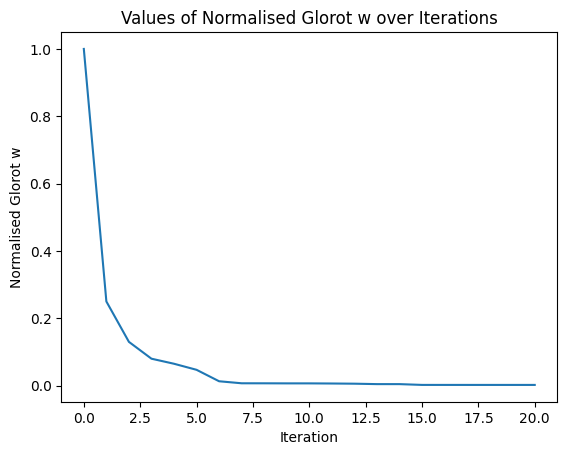

In [30]:
Normalised_Glorot_weights = w_values
plt.plot(Normalised_Glorot_weights)
plt.xlabel("Iteration")
plt.ylabel("Normalised Glorot w")
plt.title("Values of Normalised Glorot w over Iterations")
plt.show()

[0.22499999999999995, 0.09810795139627493, 0.08376057910795266, 0.08288748150594472, 0.0794958325554964, 0.0794958325554964, 0.05647756936714182, 0.01717378736112647, 0.015063859889947054, 0.012880192716405028, 0.005028653160480521, 0.0028137935090528383, 0.0027980794544486117, 0.0012864720116673768, 0.0009383082503053399, 0.0008908868609649391, 0.0005674393111880318, 0.0005313409945839894, 0.00044007769767332686, 0.00040289315784671983]


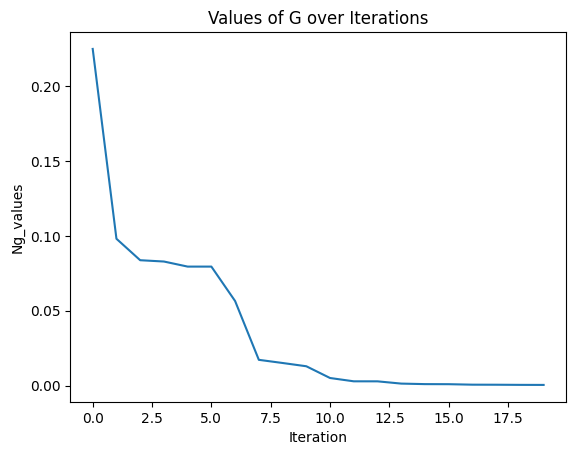

In [33]:
print(g_values)

plt.plot(g_values)
plt.xlabel("Iteration")
plt.ylabel("Ng_values")
plt.title("Values of G over Iterations")
plt.show()

## Normalised Glorot Initialization + Roulette Wheel Selection

###PSO Parameters

In [34]:
!pip install pyswarms
import numpy as np
import pyswarms as ps
# from pso.cost_functions import sphere

In [35]:
# initial_position = np.array(numbers)

# def objective_function(x):
#     return np.sum(x**2)

# bounds = (np.array([-10]), np.array([10]))

# options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

# optimizer = ps.single.GlobalBestPSO(n_particles=len(numbers), dimensions=1, options=options, bounds=bounds, init_pos=initial_position.reshape(-1, 1))

# best_cost, best_pos = optimizer.optimize(objective_function, iters=100)

# print('Best position:', best_pos)
# print('Best objective:', best_cost)


In [36]:
def sphere(x):
    return sum(x**2)

In [37]:
CostFunction = sphere  #
nVar = 10  # Number of Decision Variables
VarSize = (nVar,)  # Size of Decision Variables Matrix
VarMin = -10  # Lower Bound of Variables
VarMax = 10  # Upper Bound of Variables

In [38]:
MaxIt = 20  # Maximum Number of Iterations
nPop = np.size(numbers)  # Population Size (Swarm Size)
print(nPop)

20


In [39]:
w = 1  # Inertia Weight
wdamp = 0.99  # Inertia Weight Damping Ratio
c1 = 1.5  # Personal Learning Coefficient
c2 = 2.0  # Global Learning Coefficient

In [40]:
# Velocity Limits                        HOWW. ASK BHAIYA ABOUT THIS
VelMax = 0.1 * (VarMax - VarMin)
VelMin = -VelMax

In [41]:
particles = []

for i in range(nPop):
    position = np.array([Quasi_Random_Sequence_Initialisation[i]] * nVar)
    velocity = np.zeros(VarSize)
    cost = CostFunction(position)
    best_position = position.copy()
    best_cost = cost
    particles.append({
        'Position': position,
        'Velocity': velocity,
        'Cost': cost,
        'Best': {
            'Position': best_position,
            'Cost': best_cost
        }
    })
print(np.size(particles))

20


In [42]:
GlobalBest = {'Position': None, 'Cost': np.inf}

for p in particles:
    if p['Cost'] < GlobalBest['Cost']:
        GlobalBest = {'Position': p['Best']['Position'].copy(), 'Cost': p['Best']['Cost']}

BestCost = np.zeros(MaxIt)

### Weight W using LLM

In [43]:
w_values = []
g_values = []

for it in range(MaxIt):
    for p in particles:
        # Update Velocity
        r1 = np.random.rand(*VarSize)
        r2 = np.random.rand(*VarSize)
        p['Velocity'] = (
            w * p['Velocity']
            + c1 * r1 * (p['Best']['Position'] - p['Position'])
            + c2 * r2 * (GlobalBest['Position'] - p['Position'])
        )

        # Apply Velocity Limits
        p['Velocity'] = np.maximum(p['Velocity'], VelMin)
        p['Velocity'] = np.minimum(p['Velocity'], VelMax)

        # Update Position
        p['Position'] += p['Velocity']

        # Velocity Mirror Effect
        IsOutside = (p['Position'] < VarMin) | (p['Position'] > VarMax)
        p['Velocity'][IsOutside] = -p['Velocity'][IsOutside]

        # Apply Position Limits
        p['Position'] = np.maximum(p['Position'], VarMin)
        p['Position'] = np.minimum(p['Position'], VarMax)

        # Evaluation
        p['Cost'] = CostFunction(p['Position'])

        # Update Personal Best
        if p['Cost'] < p['Best']['Cost']:
            p['Best']['Position'] = p['Position'].copy()
            p['Best']['Cost'] = p['Cost']

        print(p['Best']['Cost'])


    costs = [p['Best']['Cost'] for p in particles]
    costs.append(GlobalBest['Cost'])
    min_cost = min(costs)
    min_p_best = min([p['Best']['Cost'] for p in particles])

    prompt = f"I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including the current global best cost ({GlobalBest['Cost']}) and various personal best costs from the particles ({min_p_best}). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally."
    g_best_finder_template = f'''SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.

    USER: {prompt}

    ASSISTANT:
    '''

    g_best_response = lcpp_llm(prompt=g_best_finder_template, max_tokens=256, temperature=0.5, top_p=0.95,
                              repeat_penalty=1.2, top_k=150,
                              echo=True)
    print(g_best_response)
    g_best_response = g_best_response['choices'][0]['text']
    g_best_value = re.findall(r'-?\d+\.\d+', g_best_response)
    g_best_value = [float(num) for num in g_best_value]
    g_best_value = g_best_value[-1] # take the last value
    print(g_best_value)
    g_values.append(g_best_value)

    if g_best_value < GlobalBest['Cost']:
        for p in particles:
            if p['Best']['Cost'] == g_best_value:
                GlobalBest['Position'] = p['Best']['Position'].copy()
                GlobalBest['Cost'] = g_best_value
                break

    BestCost[it] = GlobalBest['Cost']

    print(f"Iteration {it+1}: Best Cost = {BestCost[it]}")

    prompt = f"generate one positive number that is smaller than {w} using Normalised Glorot Initialisation. Don't write anything else, just write that number in decimal notation normally."
    w_finder_template = f'''SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.

    USER: {prompt}

    ASSISTANT:
    '''

    w_response = lcpp_llm(prompt=w_finder_template, max_tokens=256, temperature=0.5, top_p=0.95,
                          repeat_penalty=1.2, top_k=150,
                          echo=True)

    g_values.append(GlobalBest['Cost'])
    BestCost[it] = GlobalBest['Cost']

    text_response = w_response['choices'][0]['text']
    value = re.findall(r'-?\d+\.\d+', text_response)
    value = [float(num) for num in value]

    value = value[np.size(value) - 1]
    print(f'w{it+1} = {value}')
    w_values.append(w)
    w = value

w_values.append(w)
print(g_values)
print(w_values)

433.81713229401
146.32062767364658
17.441527168395975
6.572406757689307
4.010348302236676
1.0238237539665875
0.5396309317697449
0.22499999999999995
0.4652600209785952
0.9497116271829894
4.5653572498359845
10.518894512620086
11.481723506991923
11.098540090111419
25.681362617200694
43.00420832485044
84.53219495412175
131.37380982584764
216.34106850955044
340.5918704955992


Llama.generate: prefix-match hit


{'id': 'cmpl-6af048be-22bd-4df5-8d96-15a8176c0855', 'object': 'text_completion', 'created': 1720417157, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including the current global best cost (0.22499999999999995) and various personal best costs from the particles (0.22499999999999995). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n    0.22499999999999995", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 167, 'completion_tok

Llama.generate: prefix-match hit


w1 = 0.432576983
215.84528240766
35.04914034896647
8.62399018525833
6.572406757689307
4.010348302236676
1.0238237539665875
0.5396309317697449
0.22499999999999995
0.15559514927765875
0.6227649233631619
3.8259522092696368
2.6974358798963047
5.097792421335597
4.693549020382566
3.607033668097454
4.676180022626572
12.523795963732478
28.570429834995696
72.13677155340181
151.02738538721238


Llama.generate: prefix-match hit


{'id': 'cmpl-16b9aa5a-a961-4eb0-947c-1d66bd73d56b', 'object': 'text_completion', 'created': 1720417174, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including the current global best cost (0.22499999999999995) and various personal best costs from the particles (0.15559514927765875). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n    0.15559514927765875", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 167, 'completion_tok

Llama.generate: prefix-match hit


w2 = 0.123456789
70.6069418960661
8.368052380322693
3.0170548560394996
5.746497206665392
3.3476067912463057
1.0238237539665875
0.5396309317697449
0.16474650919565556
0.1455716568387742
0.3382434537423987
1.2401521488364224
1.0580931677506267
1.2201909325562763
3.364422834395971
1.6335222314586737
2.1799839512844517
0.9230068490163634
3.9352525804037364
14.81063849044126
53.874212833437724


Llama.generate: prefix-match hit


{'id': 'cmpl-cd0fc817-3ea1-4505-9131-41cbfcd66fbb', 'object': 'text_completion', 'created': 1720417192, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including the current global best cost (0.15559514927765875) and various personal best costs from the particles (0.1455716568387742). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n    0.1455716568387742", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 166, 'completion_token

Llama.generate: prefix-match hit


w3 = 0.123456788
8.766671078474838
1.4452154170915974
0.7438806684742805
3.943445936882929
0.9013268278891736
1.0238237539665875
0.3171149032176097
0.1597607626239757
0.14476410387675584
0.21497034366891432
0.4513361634196666
0.21209160200606814
0.369553263252564
0.9426968146703842
0.8554469739727484
0.5181878658729089
0.1658663760505443
0.6145686159999119
1.2802952849104503
16.087550592517164


Llama.generate: prefix-match hit


{'id': 'cmpl-0bd4be03-6954-46ac-ab47-c35597d4854f', 'object': 'text_completion', 'created': 1720417255, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including the current global best cost (0.1455716568387742) and various personal best costs from the particles (0.14476410387675584). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n     The new minimum global best cost is 0.14476410387675584.", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {

Llama.generate: prefix-match hit


w4 = 0.097654321
3.615533768146932
0.91744740409118
0.7438806684742805
2.373929602010527
0.326294048443927
1.0238237539665875
0.3171149032176097
0.1597607626239757
0.14469030689630918
0.18281340810916125
0.13025883133094157
0.16884233540453847
0.19034651517402373
0.4532253904529109
0.3988488755382314
0.19680157000467766
0.1658663760505443
0.4370538887360177
0.4968608113810312
2.833100506546892


Llama.generate: prefix-match hit


{'id': 'cmpl-7914ff2a-8bc7-46ee-b9b3-678d97cd3764', 'object': 'text_completion', 'created': 1720417322, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including the current global best cost (0.14476410387675584) and various personal best costs from the particles (0.13025883133094157). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n     Based on the information you provided, the new minimum global best cost is 0.13025883133094157.", 'index': 0, 'logprobs': Non

Llama.generate: prefix-match hit


w5 = 0.0825
0.595613988036633
0.41515685372362454
0.7438806684742805
0.9764205200677267
0.17444965990265196
0.5879732932632912
0.3171149032176097
0.1597607626239757
0.14469030689630918
0.18281340810916125
0.13025883133094157
0.16884233540453847
0.19034651517402373
0.4532253904529109
0.24950201356184606
0.19680157000467766
0.1658663760505443
0.10171547212474444
0.4968608113810312
1.889024641463136


Llama.generate: prefix-match hit


{'id': 'cmpl-97968cf1-6cea-4514-8516-cac60c3cb1a6', 'object': 'text_completion', 'created': 1720417343, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including the current global best cost (0.13025883133094157) and various personal best costs from the particles (0.10171547212474444). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n    0.10171547212474444", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 167, 'completion_tok

Llama.generate: prefix-match hit


w6 = 0.0417
0.18231031671077444
0.19516655808719482
0.21760845557708683
0.35226322780125574
0.12033943285605814
0.20334600631049235
0.3171149032176097
0.1597607626239757
0.14469030689630918
0.18281340810916125
0.1071900064121565
0.15925794276493088
0.0712694416249985
0.4532253904529109
0.24950201356184606
0.19680157000467766
0.092619218966906
0.10171547212474444
0.4968608113810312
0.1938234143245532


Llama.generate: prefix-match hit


{'id': 'cmpl-80683a36-ceac-467f-8eab-66f7c1021dd5', 'object': 'text_completion', 'created': 1720417359, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including the current global best cost (0.10171547212474444) and various personal best costs from the particles (0.0712694416249985). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n     Based on the information provided, the new minimum global best cost is 0.0712694416249985.", 'index': 0, 'logprobs': None, 'fi

Llama.generate: prefix-match hit


w7 = 0.025
0.11512826449149198
0.08745828588933166
0.12083430024902014
0.35226322780125574
0.09571141306598124
0.20334600631049235
0.3171149032176097
0.1597607626239757
0.14469030689630918
0.18281340810916125
0.1071900064121565
0.11702955341917505
0.0712694416249985
0.35585455305144237
0.24950201356184606
0.19680157000467766
0.07562762736532214
0.06740859107368592
0.384748115059883
0.12222553699410765


Llama.generate: prefix-match hit


{'id': 'cmpl-2ccb4813-925d-484c-abef-ce29f9dca0f6', 'object': 'text_completion', 'created': 1720417378, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including the current global best cost (0.0712694416249985) and various personal best costs from the particles (0.06740859107368592). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n     Based on the information provided, the new minimum global best cost is 0.06740859107368592.", 'index': 0, 'logprobs': None, 'f

Llama.generate: prefix-match hit


w8 = 0.0149
0.096801335151711
0.08201319969610221
0.103625068517756
0.35226322780125574
0.063362032343034
0.20334600631049235
0.3171149032176097
0.1597607626239757
0.14469030689630918
0.18281340810916125
0.1071900064121565
0.0787316667870492
0.0712694416249985
0.31805192111743524
0.24950201356184606
0.19680157000467766
0.07057825655953236
0.06740859107368592
0.384748115059883
0.10063512100855435


Llama.generate: prefix-match hit


{'id': 'cmpl-928ea399-e41e-413a-afa3-04f841003123', 'object': 'text_completion', 'created': 1720417413, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including the current global best cost (0.06740859107368592) and various personal best costs from the particles (0.063362032343034). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n    0.063362032343034", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 165, 'completion_tokens'

Llama.generate: prefix-match hit


w9 = 0.0123
0.06561474223049059
0.0796699238948034
0.08568181613767148
0.10169179476179227
0.063362032343034
0.08326911690010762
0.3171149032176097
0.1597607626239757
0.14469030689630918
0.18281340810916125
0.1071900064121565
0.06794301575993401
0.0712694416249985
0.23086293020986326
0.24950201356184606
0.19680157000467766
0.07057825655953236
0.06740859107368592
0.384748115059883
0.06922260222005493


Llama.generate: prefix-match hit


{'id': 'cmpl-c1202438-1f18-43b1-9662-84bcc56d241a', 'object': 'text_completion', 'created': 1720417431, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including the current global best cost (0.063362032343034) and various personal best costs from the particles (0.063362032343034). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n    0.063362032343034", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 163, 'completion_tokens': 

Llama.generate: prefix-match hit


w10 = 0.0087
0.06561474223049059
0.06412668705258284
0.07050097791734085
0.09096724962942256
0.06315229597693993
0.07128325434696631
0.3171149032176097
0.1597607626239757
0.14469030689630918
0.16386313505223418
0.1071900064121565
0.06568773545504868
0.06901267968449545
0.1457202542317249
0.24950201356184606
0.05571564239464913
0.06647576569185551
0.06740859107368592
0.384748115059883
0.06140511470397335


Llama.generate: prefix-match hit


{'id': 'cmpl-d612dc04-2928-4447-9895-a47680a5b30f', 'object': 'text_completion', 'created': 1720417445, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including the current global best cost (0.063362032343034) and various personal best costs from the particles (0.05571564239464913). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n    0.05571564239464913", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 165, 'completion_token

Llama.generate: prefix-match hit


w11 = 0.0063
0.06561474223049059
0.05978171416372287
0.07050097791734085
0.09096724962942256
0.05219583131151213
0.07128325434696631
0.27598753233817386
0.1597607626239757
0.12627583154964303
0.13152894783246485
0.09216066808486635
0.06568773545504868
0.05642702666896245
0.06808341647791293
0.24950201356184606
0.055641454363747574
0.06463188396926435
0.05909809535777763
0.1345720916520376
0.05634374231031937


Llama.generate: prefix-match hit


{'id': 'cmpl-0a471dca-2fad-49a8-9022-fbc00af6287d', 'object': 'text_completion', 'created': 1720417460, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including the current global best cost (0.05571564239464913) and various personal best costs from the particles (0.05219583131151213). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n    0.05219583131151213", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 167, 'completion_tok

Llama.generate: prefix-match hit


w12 = 0.0059
0.06561474223049059
0.05148123463074157
0.07050097791734085
0.05746854544094575
0.05216846137685933
0.07128325434696631
0.2158719717267531
0.1597607626239757
0.07897776732488992
0.05867069914624948
0.06400436438509627
0.06568773545504868
0.05642702666896245
0.06808341647791293
0.23617650984398111
0.05430456164796727
0.06234936599705856
0.05574964289171826
0.1345720916520376
0.05243334677937721


Llama.generate: prefix-match hit


{'id': 'cmpl-9c166e17-8c92-41d2-852b-5c7d1e79c394', 'object': 'text_completion', 'created': 1720417476, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including the current global best cost (0.05219583131151213) and various personal best costs from the particles (0.05148123463074157). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n    0.05148123463074157", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 167, 'completion_tok

Llama.generate: prefix-match hit


w13 = 0.0048
0.06363821379893322
0.051468558953395444
0.07001158191191209
0.05548797833933092
0.05216846137685933
0.0671393849698621
0.06816571150621308
0.1597607626239757
0.061503621613057495
0.05139727212016148
0.05831205252864102
0.06568773545504868
0.05390942478695675
0.06808341647791293
0.09484441582269638
0.05430456164796727
0.05609135353581212
0.05233957529136387
0.11393715311185627
0.05243334677937721


Llama.generate: prefix-match hit


{'id': 'cmpl-f556c1dd-539e-4a6f-90ea-cd73713044bc', 'object': 'text_completion', 'created': 1720417491, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including the current global best cost (0.05148123463074157) and various personal best costs from the particles (0.05139727212016148). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n    0.05139727212016148", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 167, 'completion_tok

Llama.generate: prefix-match hit


w14 = 0.0023
0.052973283805972785
0.051468558953395444
0.05969997024777995
0.05355970571169607
0.048162900029056085
0.0671393849698621
0.05273815482881848
0.1597607626239757
0.05296367786723641
0.05139727212016148
0.05218493331049605
0.06568773545504868
0.05304885681835161
0.06808341647791293
0.053301098462868735
0.050266549316203175
0.05086170447810155
0.05101849140402766
0.0842152600515926
0.04749904747220207


Llama.generate: prefix-match hit


{'id': 'cmpl-1aef8c14-726f-472f-b619-5bdd0ceb3b82', 'object': 'text_completion', 'created': 1720417507, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including the current global best cost (0.05139727212016148) and various personal best costs from the particles (0.04749904747220207). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n    0.05139727212016148", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 167, 'completion_tok

Llama.generate: prefix-match hit


w15 = 0.0016
0.04933720797431551
0.051468558953395444
0.050269217260691126
0.05169365801630626
0.04744398495063772
0.06016643676126917
0.05273815482881848
0.1597607626239757
0.05296367786723641
0.051384045661712174
0.05210008657147547
0.058131833439369104
0.05304885681835161
0.02886719374255229
0.053301098462868735
0.050266549316203175
0.05056538317494859
0.05101849140402766
0.05246673202932504
0.04646433960398491


Llama.generate: prefix-match hit


{'id': 'cmpl-dfd6cfa1-f701-4941-abbf-0808e210c228', 'object': 'text_completion', 'created': 1720417522, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including the current global best cost (0.05139727212016148) and various personal best costs from the particles (0.02886719374255229). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n    0.02886719374255229", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 167, 'completion_tok

Llama.generate: prefix-match hit


w16 = 0.001492
0.040876801328491086
0.03271641086003222
0.021560709150336293
0.026408950616001504
0.04744398495063772
0.05817048491880938
0.03762550966508652
0.1597607626239757
0.025723265603907128
0.02965875382973237
0.04712253598875095
0.058131833439369104
0.02634017738120981
0.02886719374255229
0.014827471740534098
0.04920100828222735
0.034506619394706
0.029458529225915426
0.02673314058876408
0.04646433960398491


Llama.generate: prefix-match hit


{'id': 'cmpl-0ab83f49-bf4e-4804-81c5-faa5c99d700f', 'object': 'text_completion', 'created': 1720417539, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including the current global best cost (0.02886719374255229) and various personal best costs from the particles (0.014827471740534098). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n    0.014827471740534098", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 168, 'completion_t

Llama.generate: prefix-match hit


w17 = 0.001387
0.015046127394997548
0.029204118280567466
0.021560709150336293
0.020387220591843076
0.04744398495063772
0.011704554616479599
0.030765748928671333
0.1597607626239757
0.012408464172973093
0.02965875382973237
0.03482523528049977
0.0405494523526989
0.014349399595929936
0.02104049152754918
0.014827471740534098
0.02836891901700786
0.016812458737659304
0.013513689497287769
0.021436771887607876
0.015017868989790791


Llama.generate: prefix-match hit


{'id': 'cmpl-b10c8091-ba27-4874-942d-eb047f328749', 'object': 'text_completion', 'created': 1720417554, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including the current global best cost (0.014827471740534098) and various personal best costs from the particles (0.011704554616479599). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n     The new minimum global best cost is 0.011704554616479599.", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage

Llama.generate: prefix-match hit


w18 = 0.001254
0.009133558830335266
0.014763692555326741
0.021560709150336293
0.020387220591843076
0.04744398495063772
0.011704554616479599
0.009055229614534106
0.1597607626239757
0.012408464172973093
0.02965875382973237
0.008325932657945274
0.01846456875624953
0.009849473372435287
0.013049836313109233
0.014827471740534098
0.020333678158071026
0.016812458737659304
0.013513689497287769
0.021436771887607876
0.015017868989790791


Llama.generate: prefix-match hit


{'id': 'cmpl-7e45ae55-f500-4453-a178-8decdc6df9f9', 'object': 'text_completion', 'created': 1720417573, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including the current global best cost (0.011704554616479599) and various personal best costs from the particles (0.008325932657945274). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n    0.008325932657945274", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 169, 'completion_

Llama.generate: prefix-match hit


w19 = 0.000976
0.009133558830335266
0.006929991612230223
0.021560709150336293
0.020387220591843076
0.04744398495063772
0.010123135180911636
0.009055229614534106
0.1597607626239757
0.012408464172973093
0.02640365539580593
0.008325932657945274
0.011642784531773136
0.009849473372435287
0.006468661418825415
0.014827471740534098
0.005800267153944027
0.009729424724255191
0.013513689497287769
0.021436771887607876
0.015017868989790791


Llama.generate: prefix-match hit


{'id': 'cmpl-29449975-66f0-407e-b6d0-5c92c03b7ff5', 'object': 'text_completion', 'created': 1720417590, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including the current global best cost (0.008325932657945274) and various personal best costs from the particles (0.005800267153944027). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n    0.005800267153944027", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 169, 'completion_

Llama.generate: prefix-match hit


w20 = 0.000854
[0.22499999999999995, 0.22499999999999995, 0.15559514927765875, 0.15559514927765875, 0.1455716568387742, 0.1455716568387742, 0.14476410387675584, 0.14476410387675584, 0.13025883133094157, 0.13025883133094157, 0.10171547212474444, 0.10171547212474444, 0.0712694416249985, 0.0712694416249985, 0.06740859107368592, 0.06740859107368592, 0.063362032343034, 0.063362032343034, 0.063362032343034, 0.063362032343034, 0.05571564239464913, 0.05571564239464913, 0.05219583131151213, 0.05219583131151213, 0.05148123463074157, 0.05148123463074157, 0.05139727212016148, 0.05139727212016148, 0.05139727212016148, 0.05139727212016148, 0.02886719374255229, 0.02886719374255229, 0.014827471740534098, 0.014827471740534098, 0.011704554616479599, 0.011704554616479599, 0.008325932657945274, 0.008325932657945274, 0.005800267153944027, 0.005800267153944027]
[1, 0.432576983, 0.123456789, 0.123456788, 0.097654321, 0.0825, 0.0417, 0.025, 0.0149, 0.0123, 0.0087, 0.0063, 0.0059, 0.0048, 0.0023, 0.0016, 0.001

In [44]:
print(w_values)

[1, 0.432576983, 0.123456789, 0.123456788, 0.097654321, 0.0825, 0.0417, 0.025, 0.0149, 0.0123, 0.0087, 0.0063, 0.0059, 0.0048, 0.0023, 0.0016, 0.001492, 0.001387, 0.001254, 0.000976, 0.000854]


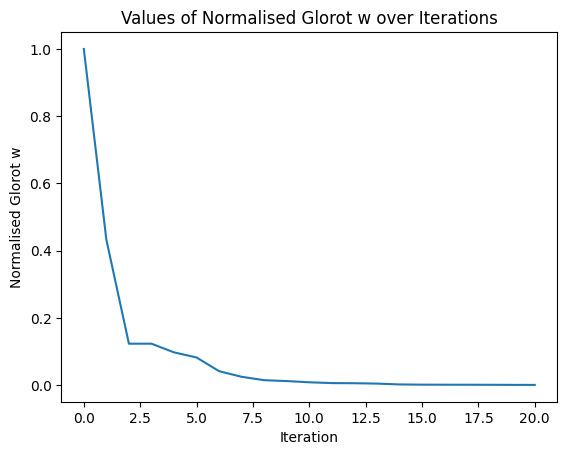

In [45]:
Roulette_Glorot_weights = w_values
plt.plot(Normalised_Glorot_weights)
plt.xlabel("Iteration")
plt.ylabel("Normalised Glorot w")
plt.title("Values of Normalised Glorot w over Iterations")
plt.show()

[0.22499999999999995, 0.22499999999999995, 0.15559514927765875, 0.15559514927765875, 0.1455716568387742, 0.1455716568387742, 0.14476410387675584, 0.14476410387675584, 0.13025883133094157, 0.13025883133094157, 0.10171547212474444, 0.10171547212474444, 0.0712694416249985, 0.0712694416249985, 0.06740859107368592, 0.06740859107368592, 0.063362032343034, 0.063362032343034, 0.063362032343034, 0.063362032343034, 0.05571564239464913, 0.05571564239464913, 0.05219583131151213, 0.05219583131151213, 0.05148123463074157, 0.05148123463074157, 0.05139727212016148, 0.05139727212016148, 0.05139727212016148, 0.05139727212016148, 0.02886719374255229, 0.02886719374255229, 0.014827471740534098, 0.014827471740534098, 0.011704554616479599, 0.011704554616479599, 0.008325932657945274, 0.008325932657945274, 0.005800267153944027, 0.005800267153944027]


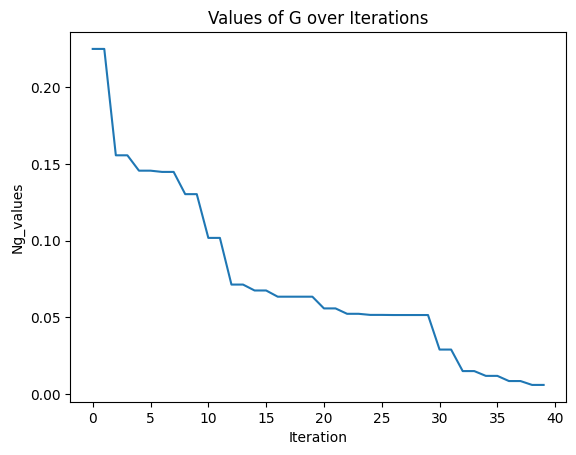

In [46]:
Roulette_Glorot_g_values = g_values

print(g_values)

plt.plot(Roulette_Glorot_g_values)
plt.xlabel("Iteration")
plt.ylabel("Ng_values")
plt.title("Values of G over Iterations")
plt.show()